In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
import sklearn.metrics as sm

%matplotlib inline

FIG_SIZE = (14,8)

https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set

In [2]:
data=pd.read_csv('energy_efficiency_data.csv')
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<AxesSubplot:title={'center':'Heatmap of correlation in each catagory'}>

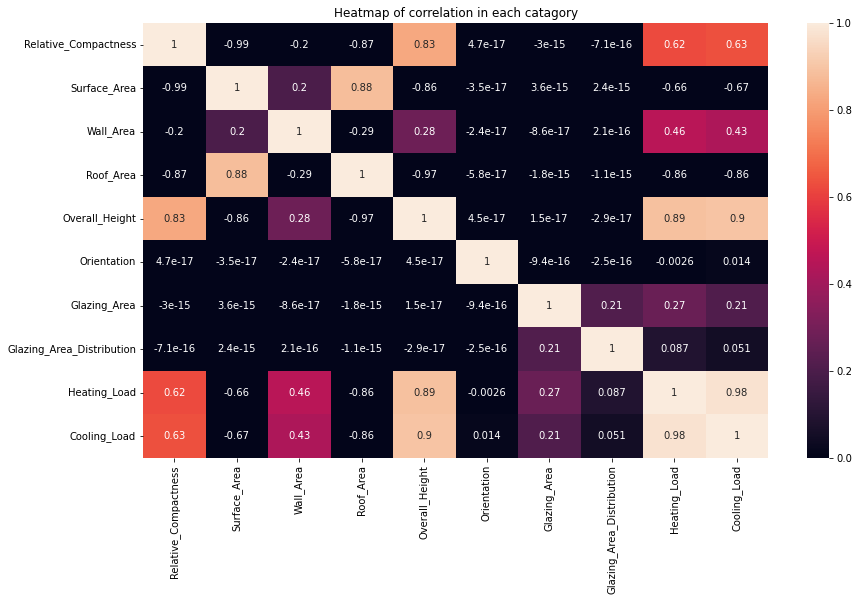

In [36]:
#visualize correlation of the data
correlations= data.corr()
plt.figure(figsize=FIG_SIZE)
plt.title("Heatmap of correlation in each catagory")
sns.heatmap(correlations,vmin=0,vmax=1,annot=True)

In [37]:
y=data.iloc[:,8:]
X=data.iloc[:,:8]

In [38]:
y1=y.iloc[:,:1]
y2=y.iloc[:,1:]

In [39]:
#Splitting data to Training and Testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train1,y_test1,y_train2,y_test2=train_test_split(X,y1,y2,test_size=0.2,random_state=0)

In [40]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [41]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7
0,-0.971851,0.978553,-0.002780,0.957784,-0.983844,-0.438156,1.231324,0.125603
1,-0.210976,0.142904,-1.709544,0.957784,-0.983844,0.464621,-1.026614,-0.522464
2,0.264572,-0.414195,0.566142,-0.675770,1.016421,-0.438156,-1.026614,-0.522464
3,0.549900,-0.692745,-0.002780,-0.675770,1.016421,0.464621,-1.779260,-1.818599
4,2.071651,-1.806944,-0.571701,-1.492547,1.016421,-0.438156,1.231324,-1.170532


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
regressor=LinearRegression()
reg1=regressor.fit(X_train,y_train1)
reg2=regressor.fit(X_train,y_train2)
pred1=reg1.predict(X_test)
pred2=reg2.predict(X_test)